In [1]:
import numpy as np
from ler import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [26]:
ler = LeR(z_max=10)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_6.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_6.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_6.pickle


In [19]:
zs = np.geomspace(0.01, 20, 100)
tau = ler.lens_galaxy_pop.strong_lensing_optical_depth(zs=zs)

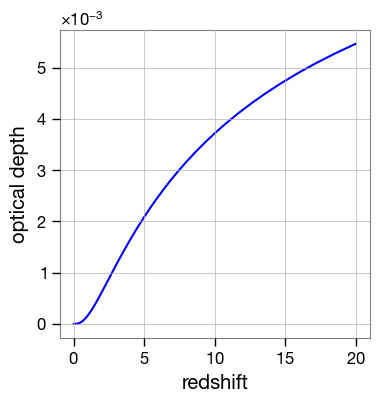

In [25]:
# plot optical depth vs redshift
plt.plot(zs, tau, 'b-')
plt.xlabel('redshift')
plt.ylabel('optical depth')
plt.show()

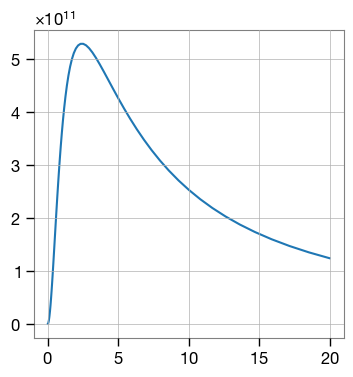

In [24]:
# plot differential comoving volume
dVdz = ler.compact_binary_pop.differential_comoving_volume(zs)
plt.plot(zs, dVdz)

In [28]:
ler = LeR(z_max=10, event_type='BNS', spin_zero=True)

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_6.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_6.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_6.pickle


In [29]:
batch_size = 50000;
ler.unlensed_cbc_statistics(json_file="./gw_params_BNS_500k.json");

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...


In [31]:
ler.unlensed_rate(gw_param="./gw_params_BNS_500k.json",jsonfile="./gw_params_detectable_BNS_500k.json");

getting gw_params from json file ./gw_params_BNS_500k.json...
total unlensed rate (yr^-1) (with step function): 4.420106413173566
storing detectable unlensed params in ./gw_params_detectable_BNS_500k.json


In [32]:
ler.lensed_cbc_statistics(json_file="./lensed_params_BNS_500k.json");

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4684.79it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4676.04it/s]


calculating snrs...
Batch no. 3
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4685.29it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4699.76it/s]


calculating snrs...


{'zl': array([0.33188209, 0.64499053, 0.15741181, ..., 0.67404732,
        0.35273474, 0.42856464]),
 'zs': array([2.71997416, 4.10514722, 2.36897485, ..., 8.27124658,
        3.03898088, 3.88405189]),
 'sigma': array([135.46089775, 235.46741089, 199.76938735, ...,
        281.19710861, 125.523639  , 165.21231619]),
 'q': array([0.26844218, 0.52454856, 0.34013157, ..., 0.63405179,
        0.53720778, 0.87341164]),
 'e1': array([-0.2422149 ,  0.18652139, -0.348588  , ...,  0.05748886,
         0.10053719, -0.06496776]),
 'e2': array([ 0.52340975,  0.24993753, -0.34775722, ...,  0.21644692,
        -0.28377732,  0.0185751 ]),
 'gamma1': array([ 0.03655012,  0.04194586, -0.01911481, ..., -0.01224624,
         0.0073266 ,  0.00161021]),
 'gamma2': array([ 0.0391482 , -0.02442696,  0.05801566, ...,  0.05569327,
         0.13355778, -0.03743201]),
 'Dl': array([1015.24385158, 1466.73072845,  579.9181645 , ...,
        1494.20385791, 1056.483938  , 1190.82316011]),
 'Ds': array([1670.9991847 

In [33]:
ler.lensed_rate(
        lensed_param="./lensed_params_BNS_500k.json",
        snr_threshold=8.0,
        num_img=2,
        jsonfile="./lensed_params_detectable_BNS_500k.json",
        none_as_nan=True,
        detectability_condition="step_function",
    );

getting lensed_param from json file ./lensed_params_BNS_500k.json...
total lensed rate (yr^-1) (with step function): 0.0011512094525739129
storing detectable lensed params in ./lensed_params_detectable_BNS_500k.json...


In [35]:
ler.rate_comparision();

unlensed_rate: 4.420106413173566
lensed_rate: 0.0011512094525739129
ratio: 3839.5327655544725


In [38]:
import json
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# getting data from json
# all
with open("./gw_params_BNS_500k.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BNS_500k.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./gw_params_detectable_BNS_500k.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BNS_500k.json") as f:
    lensed_params_detectable = json.load(f)

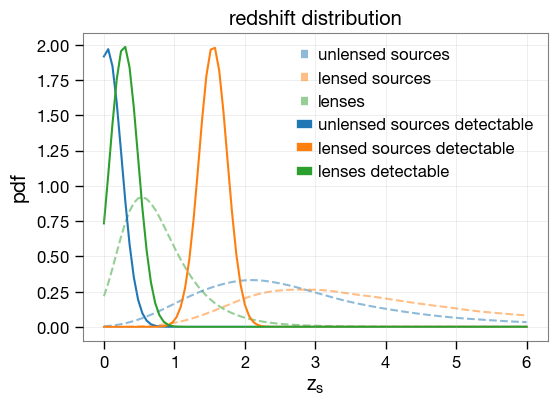

In [41]:
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))
# plot
plt.figure(figsize=(6,4))
zs = np.linspace(0,6,100)
# all
plt.plot(zs, np.exp(kde_unlensed.score_samples(zs.reshape(-1,1))), label='unlensed sources', color='C0', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lensed.score_samples(zs.reshape(-1,1))), label='lensed sources', color='C1', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lenses.score_samples(zs.reshape(-1,1))), label='lenses', color='C2', linestyle='--', alpha=0.5)
# detectable
plt.plot(zs, np.exp(kde_unlensed_detectable.score_samples(zs.reshape(-1,1))), label='unlensed sources detectable', color='C0')
plt.plot(zs, np.exp(kde_lensed_detectable.score_samples(zs.reshape(-1,1))), label='lensed sources detectable', color='C1')
plt.plot(zs, np.exp(kde_lenses_detectable.score_samples(zs.reshape(-1,1))), label='lenses detectable', color='C2')
plt.xlabel(r'$z_s$')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.3)
plt.title('redshift distribution')
plt.savefig("redshift_distribution_conf1.png")

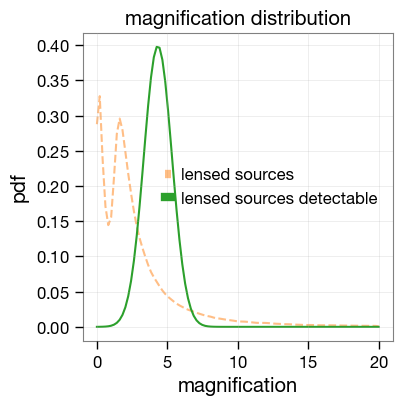

In [42]:
# KDE plot for magnification distribution
# all
mag = abs(np.array(lensed_params['magnifications']).flatten())
idx = mag<20.
mag= mag[idx]
# lesned case only
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(mag.reshape(-1,1))
# detectable
mag = abs(np.array(lensed_params_detectable['magnifications']).flatten())
idx = mag<20.
mag= mag[idx]
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=1).fit(mag.reshape(-1,1))
# plot
plt.figure(figsize=(4,4))
mag = np.linspace(0,20,100)
# all
plt.plot(mag, np.exp(kde_lensed.score_samples(mag.reshape(-1,1))), label='lensed sources', color='C1', linestyle='--', alpha=0.5)
# detectable
plt.plot(mag, np.exp(kde_lensed_detectable.score_samples(mag.reshape(-1,1))), label='lensed sources detectable', color='C2')
plt.xlabel('magnification')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.3)
plt.title('magnification distribution')
plt.savefig("magnification_distribution_conf1.png")